In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random


In [9]:

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]

Задача 1

In [33]:
k = 10
samplesX = samples[::2]
samplesY = samples[1::2]

f_obs = (np.histogram2d(samplesX, samplesY, [np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)])[0]).reshape(k**2,)
f_exp = np.full(k**2, len(samples) // (2*k**2))

print(f_obs) 
print(f_exp) 

stats.chisquare(f_obs, f_exp)

[ 6. 12.  5.  2.  2.  3.  4.  7.  3.  3.  6.  4.  5.  1. 10.  8.  5.  4.
  6.  3.  4.  6.  4.  8.  5.  5.  2.  4.  3.  2.  3.  5.  5.  3.  8.  5.
  5.  8.  5. 13.  7.  4.  4.  5.  3.  3.  4.  7.  3.  0.  3.  6.  0.  4.
  5.  6.  4.  6.  5.  6.  2.  6.  3.  3.  8.  5.  3.  4.  9.  0.  2.  7.
  9.  7.  8.  6.  5.  4.  7.  1.  7.  5.  2.  6.  4.  5.  6.  9.  7.  5.
  3.  7.  7.  5.  7.  7.  3.  3.  7.  9.]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643)

Задача 2

In [10]:
n = 1000
d = 200
k = n//d 

samples_3 = np.split(np.array(samples), d)
samples_null = np.zeros(n)


for i in range(0, n -1):
    if samples[i] > samples[i +1]: 
        samples_null[i] = 1
    
    if samples[i] < samples[i +1]: 
        samples_null[i] = -1
    
    if i % (n//d) == 0:
        samples_null[i] = 0

samples_null_2 = np.split(samples_null, d)
f_obs = np.unique(samples_null_2, return_counts = True, axis = 0)[1]
f_exp = np.full(len(f_obs) ,n // np.math.factorial(k))

f_obs, f_exp, stats.chisquare(f_obs, (np.sum(f_obs)/np.sum(f_exp))*f_exp)


(array([ 2,  5, 10,  7, 13,  1, 28, 20,  5, 10, 16, 29, 17, 10, 20,  7],
       dtype=int64),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 Power_divergenceResult(statistic=87.36, pvalue=3.0744962418968823e-12))

Задача 3

Задача 4

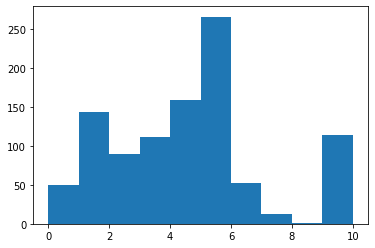

[1. 4. 5. 0. 5. 0. 5. 5. 3. 4. 6. 5. 4. 5. 0. 6. 9. 9. 6. 5. 1. 5. 2. 4.
 0. 5. 6. 5. 5. 1. 4. 1. 2. 9. 5. 3. 5. 5. 5. 3. 5. 4. 5. 6. 5. 6. 1. 4.
 3. 4. 3. 5. 3. 3. 4. 5. 2. 5. 2. 9. 9. 5. 5. 3. 9. 0. 6. 1. 2. 0. 5. 5.
 4. 5. 1. 5. 0. 7. 5. 9. 4. 2. 3. 5. 4. 1. 0. 5. 0. 1. 5. 1. 5. 5. 2. 1.
 9. 1. 5. 6. 1. 4. 5. 2. 5. 4. 5. 5. 4. 1. 2. 1. 2. 3. 0. 4. 2. 4. 6. 4.
 9. 9. 5. 5. 4. 1. 5. 6. 9. 4. 7. 3. 4. 4. 1. 1. 4. 9. 5. 9. 4. 1. 5. 2.
 5. 5. 6. 5. 9. 4. 5. 6. 9. 6. 2. 5. 0. 4. 1. 3. 5. 1. 5. 5. 5. 1. 1. 3.
 4. 1. 9. 5. 1. 3. 2. 1. 2. 5. 4. 4. 2. 4. 1. 2. 3. 1. 3. 3. 3. 3. 1. 2.
 5. 1. 5. 5. 4. 1. 3. 1. 4. 5. 3. 1. 3. 4. 2. 5. 5. 0. 4. 9. 2. 5. 5. 5.
 5. 9. 9. 4. 6. 3. 5. 2. 0. 5. 7. 9. 3. 6. 2. 1. 5. 5. 6. 3. 1. 5. 5. 9.
 2. 1. 9. 2. 9. 5. 5. 3. 4. 9. 1. 2. 6. 1. 4. 4. 3. 5. 3. 5. 0. 5. 4. 5.
 5. 9. 9. 3. 4. 3. 9. 4. 5. 1. 4. 5. 1. 5. 3. 9. 2. 2. 9. 1. 4. 5. 4. 9.
 4. 4. 9. 5. 4. 4. 5. 5. 5. 9. 1. 5. 1. 5. 4. 3. 2. 9. 5. 4. 5. 1. 0. 9.
 4. 3. 3. 1. 4. 1. 2. 0. 1. 4. 7. 1. 2. 3. 9. 4. 5.

In [15]:
weights = np.array([ 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()
weights = [weights[:k].sum() for k in range(1,11,1)]

sample = np.zeros(1000)

for i in range (1000):
    value = np.random.rand()
    j = 0
    while value >= weights[j]:
        sample[i] += 1
        j += 1


plt.hist(sample, range = (0,10)) 
plt.show()
print(sample)

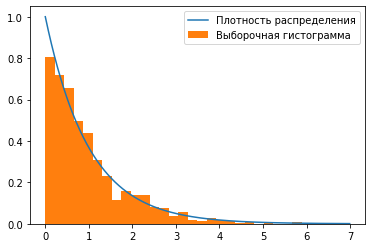

In [28]:
from math import exp
l = 1
sampleEXP = [-(np.log(1 - np.random.rand()))/l for _ in range(1000)]

plt.plot(np.arange(0, 7, 0.01), l * np.exp(-l * np.arange(0, 7, 0.01)), label = "Плотность распределения")
plt.hist(sampleEXP, 30, density = True, label = "Выборочная гистограмма")


plt.legend()
plt.show()

Задача 6

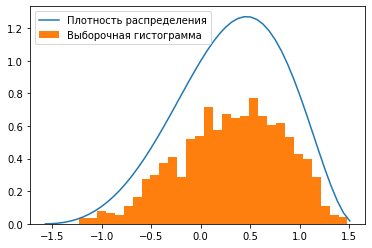

In [42]:
limit_right = np.pi/2
limit_left = -np.pi/2

def density(x):
    return np.exp(x)*(np.cos(x))**2

sample = np.zeros(1000)
i =0
while i < 1000:
    point = np.random.rand(2)
    x = point[0]*(limit_right - limit_left)+limit_left
    y = point[1]*2
    if(y <= density(x)):
        sample[i] = x
        i += 1
        
    

X = np.arange(-np.pi/2, np.pi/2, np.pi/50)
plt.plot(X, density(X), label = "Плотность распределения")
plt.hist(sample, 30, density = True, label = "Выборочная гистограмма")

plt.legend()
plt.show()



Задача 7

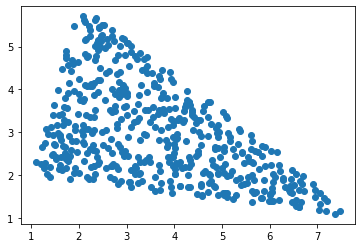

In [46]:
sample = np.zeros((500, 2))
A = np.array([1,2])
B = np.array([8,1])
C = np.array([2,6])
AB = B - A
AC = C - A
i = 0
for i in range (500):
    point = np.random.rand(2)
    x = point[0]
    y = point[1]
    if (x+y > 1):
        x, y = 1-x, 1-y
    sample[i] = A + x*AB + y*AC


plt.scatter (sample[:, 0], sample[:, 1])
plt.show()

Задача 8

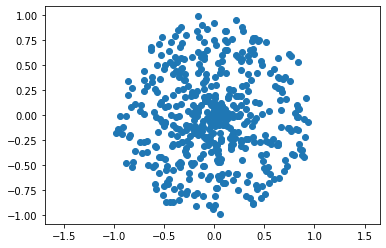

In [6]:
sample = np.zeros((500, 2))
i = 0
for i in range (500):
    alf = np.random.rand()*np.pi*2
    r = np.random.rand()
    sample[i][0] = r*np.cos(alf)
    sample[i][1] = r*np.sin(alf)

plt.scatter (sample[:, 0], sample[:, 1])
plt.axis('equal')
plt.show()